# Finance Data Project 

### Author: Ajibade Abdulquddus

The scope of this data project is to focus on exploratory data analysis of stock prices.
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

### Getting the necessary imports and initializations

In [26]:
from pandas_datareader import data, wb
import plotly
import cufflinks as cf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline


## Getting the Finance Data

Making use of pandas datareader, we will get stock information for the following banks:

* Bank of America (BAC)
* CitiGroup (C)
* Goldman Sachs (GS)
* JPMorgan Chase (JPM)
* Morgan Stanley (MS)
* Wells Fargo (WFC)

In [5]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [9]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

**Creating a list (tickers) of the ticker symbols (as strings) in alphabetical order:**

In [7]:
tickers= ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC' ]

**Using pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks and setting the keys argument equal to the tickers list (on the column axis)**

In [14]:
bank_stocks= pd.concat([BAC, C, GS, JPM, MS, WFC ], axis= 1, keys= tickers)
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.942654   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.582188   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.625443   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.574951   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.596600   

                     C                                        ...      \
                  High         Low        Open       Close    ...       
Date                                                          ...       
2006-01-03  493.799988  481.100006  490.000000  492.899994    ...       
2006-01-04  491.000000  483.500000  488.600006  483.799988    ...       
2006-01-05  487.799988  484.000000  484.399994  486.200012    ...       
2006-01-06  489.000000  482.000000  488.799988  486.200012    ...       
2006-01-09  487.399994  483.000000  486.000000  483.899994    ...       

                   MS                                         WFC             \
                 Open      Close     Volume  Adj Close       High        Low   
Date                                                                           
2006-01-03  57.169998  58.310001  5377000.0  36.114265  31.975000  31.195000   
2006-01-04  58.700001  58.349998  7977800.0  36.139046  31.820000  31.365000   
2006-01-05  58.549999  58.509998  5778000.0  36.238132  31.555000  31.309999   
2006-01-06  58.770000  58.570000  6889800.0  36.275295  31.775000  31.385000   
2006-01-09  58.630001  59.189999  4144500.0  36.659290  31.825001  31.555000   

                                                         
                 Open      Close      Volume  Adj Close  
Date                                                     
2006-01-03  31.600000  31.900000  11016400.0  20.444870  
2006-01-04  31.799999  31.530001  10870000.0  20.207741  
2006-01-05  31.500000  31.495001  10158000.0  20.185305  
2006-01-06  31.580000  31.680000   8403800.0  20.303869  
2006-01-09  31.674999  31.674999   5619600.0  20.300659  

[5 rows x 36 columns]

**Setting the column name levels:**

In [15]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      \
Stock Info   Adj Close        High         Low        Open       Close   
Date                                                                     
2006-01-03   33.942654  493.799988  481.100006  490.000000  492.899994   
2006-01-04   33.582188  491.000000  483.500000  488.600006  483.799988   
2006-01-05   33.625443  487.799988  484.000000  484.399994  486.200012   
2006-01-06   33.574951  489.000000  482.000000  488.799988  486.200012   
2006-01-09   33.596600  487.399994  483.000000  486.000000  483.899994   

Bank Ticker    ...             MS                                         WFC  \
Stock Info     ...           Open      Close     Volume  Adj Close       High   
Date           ...                                                              
2006-01-03     ...      57.169998  58.310001  5377000.0  36.114265  31.975000   
2006-01-04     ...      58.700001  58.349998  7977800.0  36.139046  31.820000   
2006-01-05     ...      58.549999  58.509998  5778000.0  36.238132  31.555000   
2006-01-06     ...      58.770000  58.570000  6889800.0  36.275295  31.775000   
2006-01-09     ...      58.630001  59.189999  4144500.0  36.659290  31.825001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2006-01-03   31.195000  31.600000  31.900000  11016400.0  20.444870  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  20.207741  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  20.185305  
2006-01-06   31.385000  31.580000  31.680000   8403800.0  20.303869  
2006-01-09   31.555000  31.674999  31.674999   5619600.0  20.300659  

[5 rows x 36 columns]

# Exploratory Data Analysis (EDA)


**Gettin the max Close price for each bank's stock throughout the time period**

In [16]:
bank_stocks.xs(key= 'Close', axis= 1, level= 'Stock Info').max()


Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

**Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [17]:
returns= pd.DataFrame()

**Using pandas pct_change() method on the Close column to create a column representing this return value. Then Creating a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [18]:
for ticks in tickers:
    returns[ticks + ' Returns']= bank_stocks[ticks]['Close'].pct_change()
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Creating a pairplot using seaborn of the returns dataframe:**

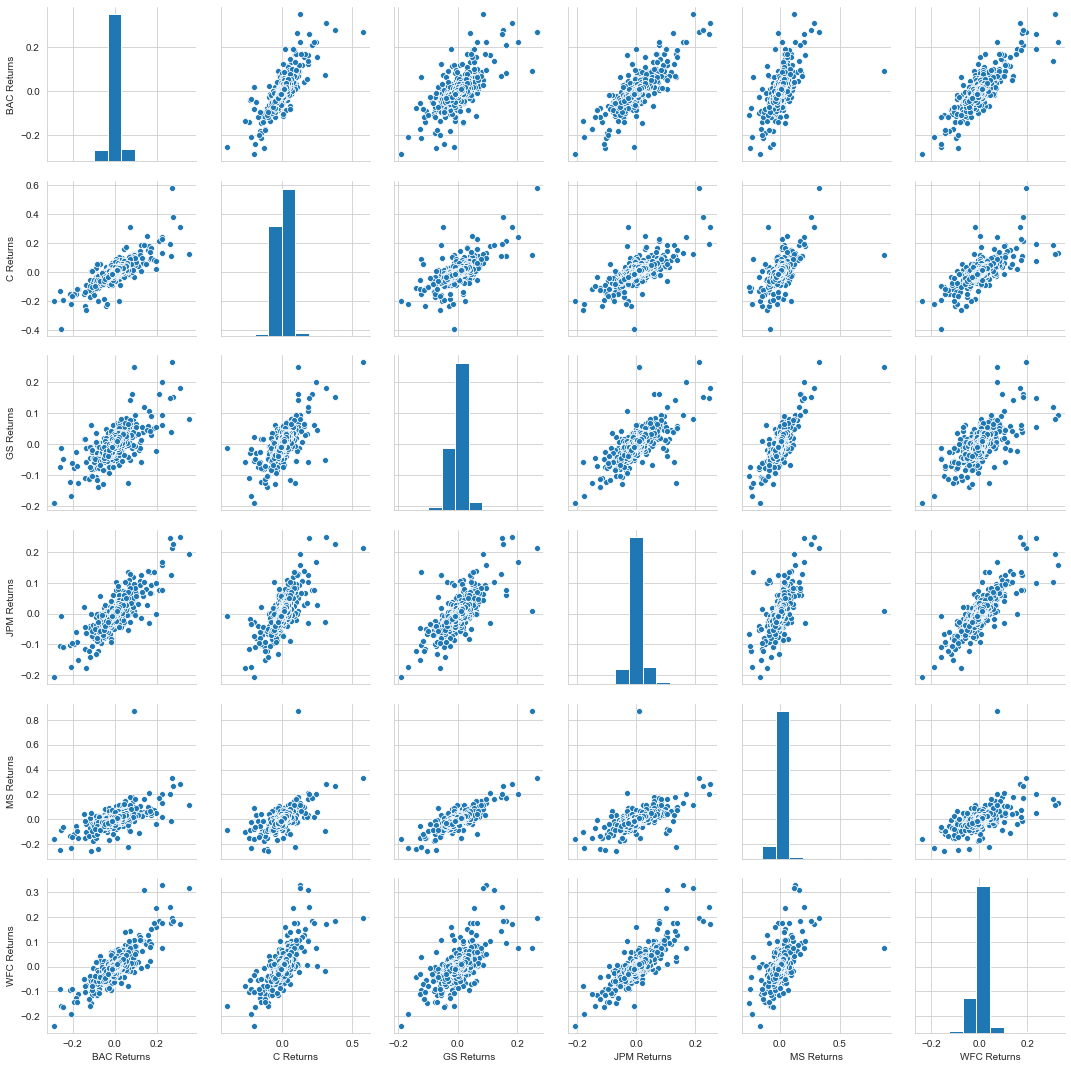

In [19]:
sns.set_style('whitegrid')
sns.pairplot(returns[1:])

**Using this returns DataFrame to figure out on what dates each bank stock had the best and worst single day returns.**

In [20]:
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

In [21]:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

**Getting the stock that is the riskiest over the entire time period and for the year 2015 taking a look at the standard deviation of the returns:**

In [22]:
returns.std()

BAC Returns    0.036647
C Returns      0.038672
GS Returns     0.025390
JPM Returns    0.027667
MS Returns     0.037819
WFC Returns    0.030238
dtype: float64

In [23]:
returns['2015-01-01':'2015-12-31'].std()

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

**Creating a distplot using seaborn of the 2015 returns for Morgan Stanley:**

C:\Users\Ajisco\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<AxesSubplot:xlabel='MS Returns'>

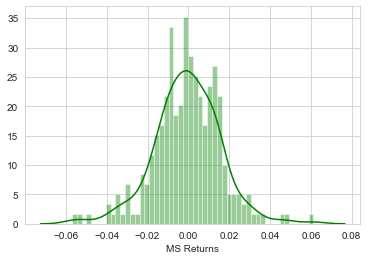

In [24]:
sns.distplot(returns['MS Returns']['2015-01-01':'2015-12-31'], color= 'green', bins=50)

**Creating a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\Ajisco\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<AxesSubplot:xlabel='C Returns'>

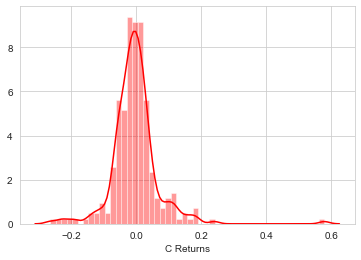

In [25]:
sns.distplot(returns['C Returns']['2008-01-01':'2008-12-31'], color='red', bins=50)

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

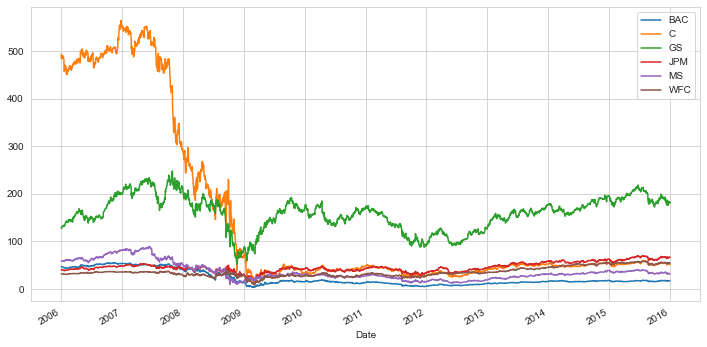

In [36]:
for ticks in tickers:
    bank_stocks[ticks]['Close'].plot(figsize=(12,6), label=ticks)
plt.legend()

In [37]:
returns.iplot(kind='surface',colorscale='rdylbu')

<AxesSubplot:xlabel='Date'>

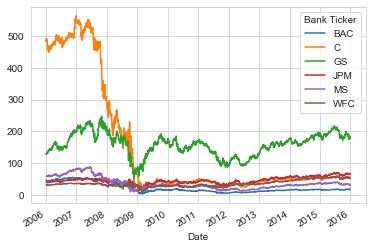

In [38]:
bank_stocks.xs(key='Close', level= 'Stock Info', axis=1).plot()

**Plotting a box iplot for the DataFrame above**

In [28]:
bank_stocks.xs(key='Close', level= 'Stock Info', axis=1).iplot(kind= 'box')

#### Analyzing the moving averages for these stocks in the year 2008. 

**Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008:**

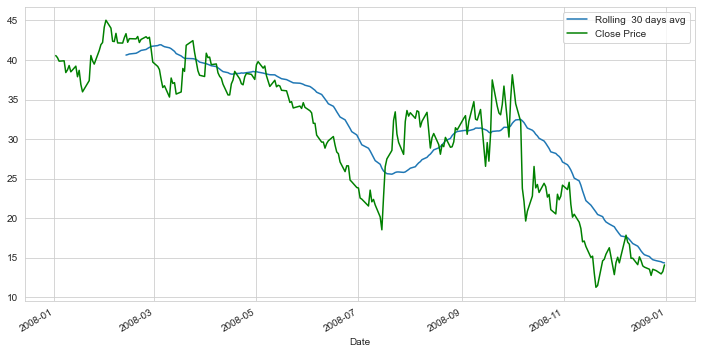

In [40]:
plt.figure(figsize=(12,6))
BAC['Close']['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label= 'Rolling  30 days avg')
BAC['Close']['2008-01-01':'2008-12-31'].plot(label= 'Close Price',color='green')
plt.legend()

**Creating a heatmap of the correlation between the stocks Close Price:**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

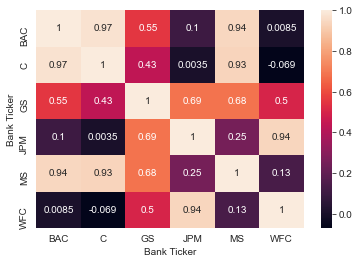

In [45]:
bc= bank_stocks.xs(key='Close',axis= 1, level= 'Stock Info').corr()
sns.heatmap(bc, annot= True)

**Using seaborn's clustermap to cluster the correlations together:**

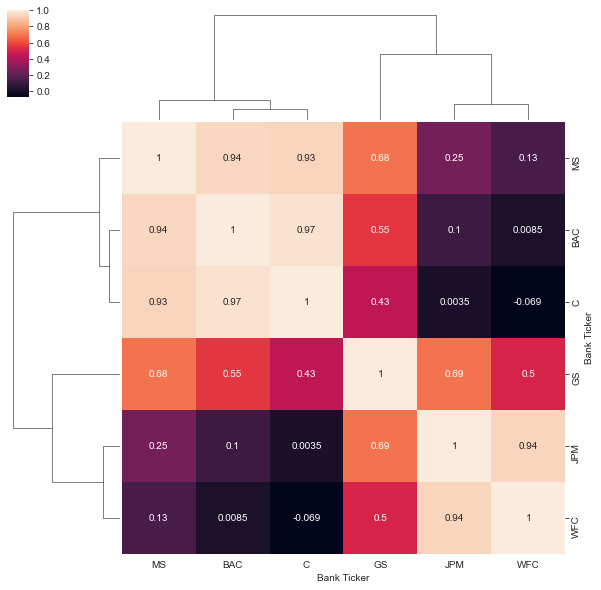

In [47]:
sns.clustermap(bc, annot=True)

**Using .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016:**

In [29]:
BAC['2015-01-01': '2016-01-01'].iplot(kind= 'candle')

**Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015:**

In [30]:
MS['2015-01-01': '2015-12-31'].ta_plot(study='sma')

**Using .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015:**

In [31]:
BAC['2015-01-01': '2015-12-31'].ta_plot(study='sma')

# The End!

**To drop comments and Follow for more of this:**

GitHub: https://github.com/Ajisco

LinkedIn: https://www.linkedin.com/in/ajibade-abdulquddus-ab5237159

Twitter: https://mobile.twitter.com/Dayo_Ajisco

Instagram: https://www.instagram.com/dayo_ajisco

Phone No./ WhatsApp No.: +2349030987312